In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2003.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2003,18004,430,41,3503
1,2003,17716,21,28,3546
2,2003,17456,27,28,3557
3,2003,17699,382,29,3510
4,2003,17708,209,38,3550
...,...,...,...,...,...
1844,2003,17673,29,41,3503
1845,2003,17337,226,31,3527
1846,2003,17069,135,33,3513
1847,2003,17637,286,38,3549


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1849, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1849 non-null   int64
 1   Maximum length (m))  1849 non-null   int64
 2   Recession(m),        1849 non-null   int64
 3   Rate/yr(m)           1849 non-null   int64
 4   Snout altitude (m)   1849 non-null   int64
dtypes: int64(5)
memory usage: 72.4 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1849


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2003,18004,430,41,3503
1,2003,17716,21,28,3546
2,2003,17456,27,28,3557
3,2003,17699,382,29,3510
4,2003,17708,209,38,3550


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0227,-0.0146,-0.0236
"Recession(m),",NaN,0.0227,1.0000,-0.0448,-0.0293
Rate/yr(m),NaN,-0.0146,-0.0448,1.0000,-0.0131
Snout altitude (m),NaN,-0.0236,-0.0293,-0.0131,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Recession(m),          0.0227
Rate/yr(m)            -0.0146
Snout altitude (m)    -0.0236
Year                      NaN
Name: Maximum length (m)), dtype: float64

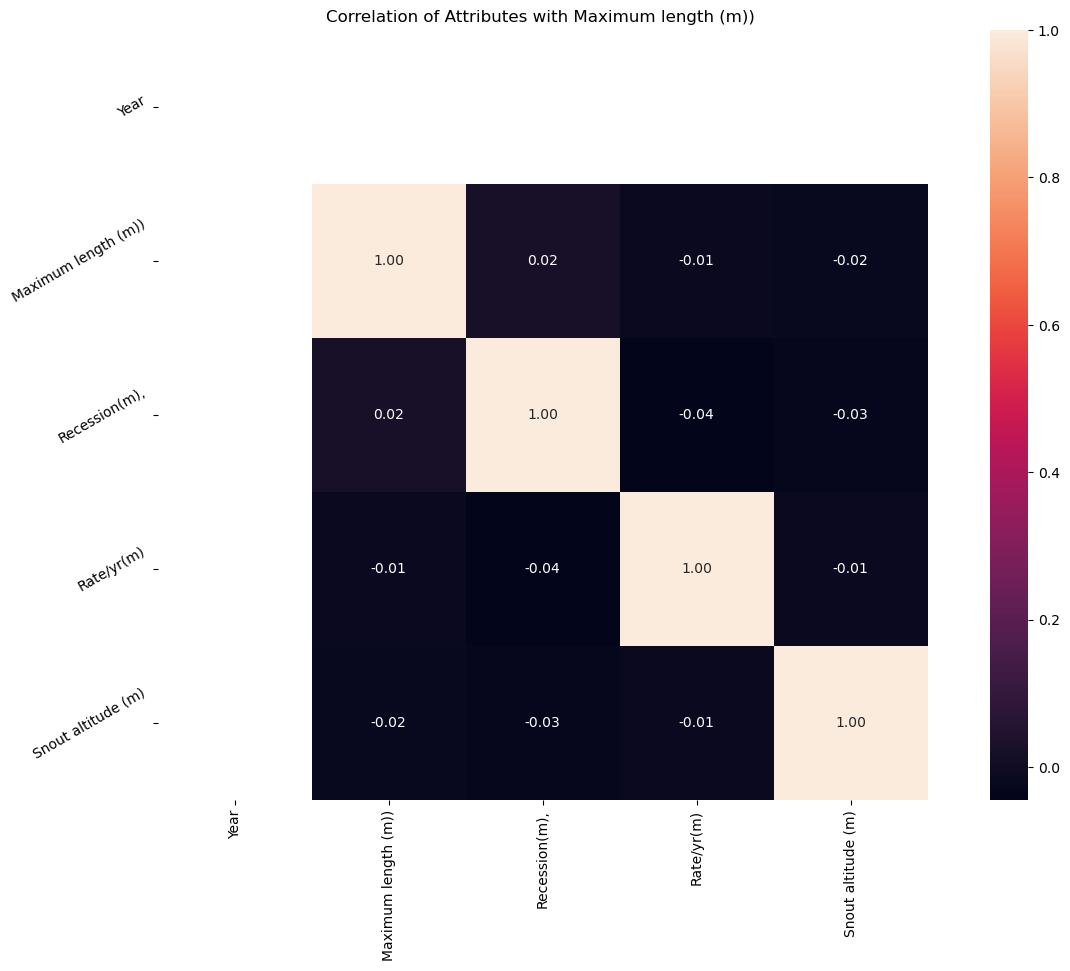

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,849.0000","1,849.0000","1,849.0000","1,849.0000","1,849.0000"
mean,"2,003.0000","17,549.3202",220.2120,27.3115,"3,532.6485"
std,0.0000,298.6213,128.8246,8.5671,20.3849
min,"2,003.0000","17,036.0000",0.0000,13.0000,"3,496.0000"
25%,"2,003.0000","17,289.0000",105.0000,20.0000,"3,515.0000"
50%,"2,003.0000","17,550.0000",220.0000,27.0000,"3,532.0000"
75%,"2,003.0000","17,797.0000",336.0000,34.0000,"3,550.0000"
max,"2,003.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2003   1.0000
Name: Year, dtype: float64

366   0.0070
62    0.0054
86    0.0054
317   0.0054
274   0.0049
       ...  
194   0.0005
160   0.0005
166   0.0005
412   0.0005
335   0.0005
Name: Recession(m),, Length: 435, dtype: float64

31   0.0433
29   0.0427
41   0.0406
18   0.0389
27   0.0379
28   0.0373
17   0.0373
21   0.0368
22   0.0352
16   0.0352
25   0.0346
14   0.0341
39   0.0335
20   0.0330
37   0.0324
32   0.0324
30   0.0319
13   0.0319
24   0.0314
19   0.0314
23   0.0314
40   0.0303
38   0.0297
33   0.0292
36   0.0292
34   0.0287
42   0.0281
26   0.0281
15   0.0276
35   0.0260
Name: Rate/yr(m), dtype: float64

3521   0.0206
3528   0.0189
3564   0.0189
3530   0.0184
3567   0.0178
        ...  
3540   0.0103
3536   0.0097
3499   0.0092
3497   0.0081
3496   0.0016
Name: Snout altitude (m), Length: 72, dtype: float64



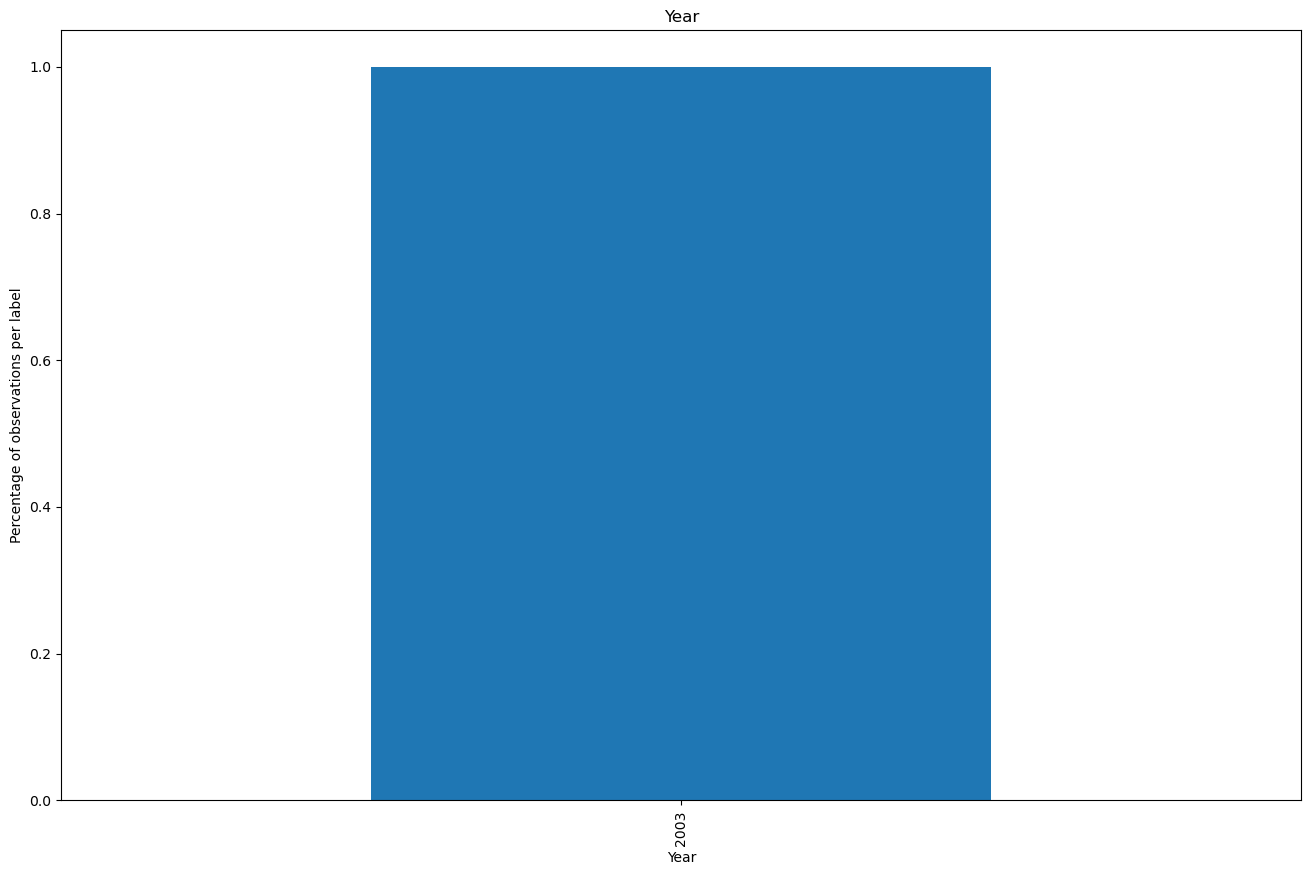

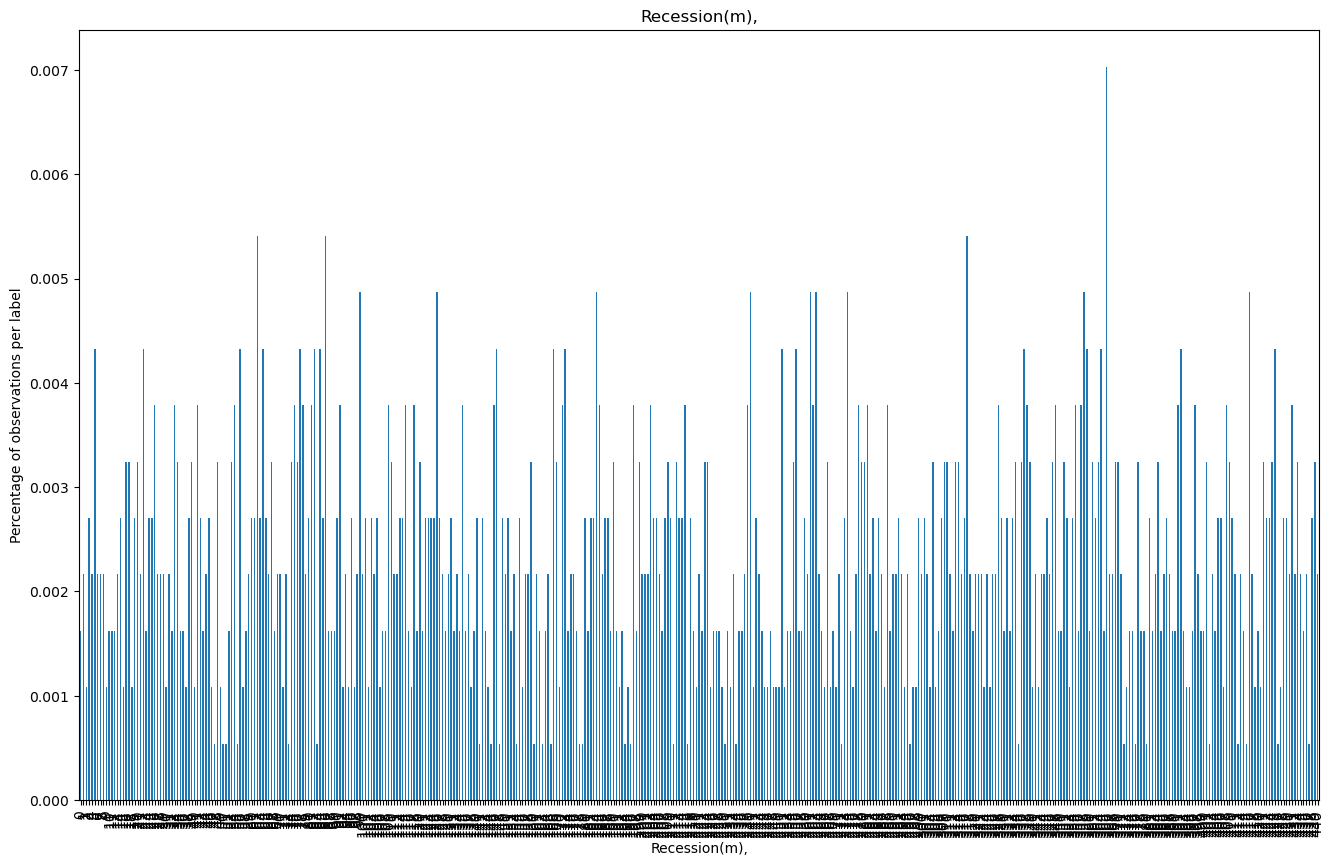

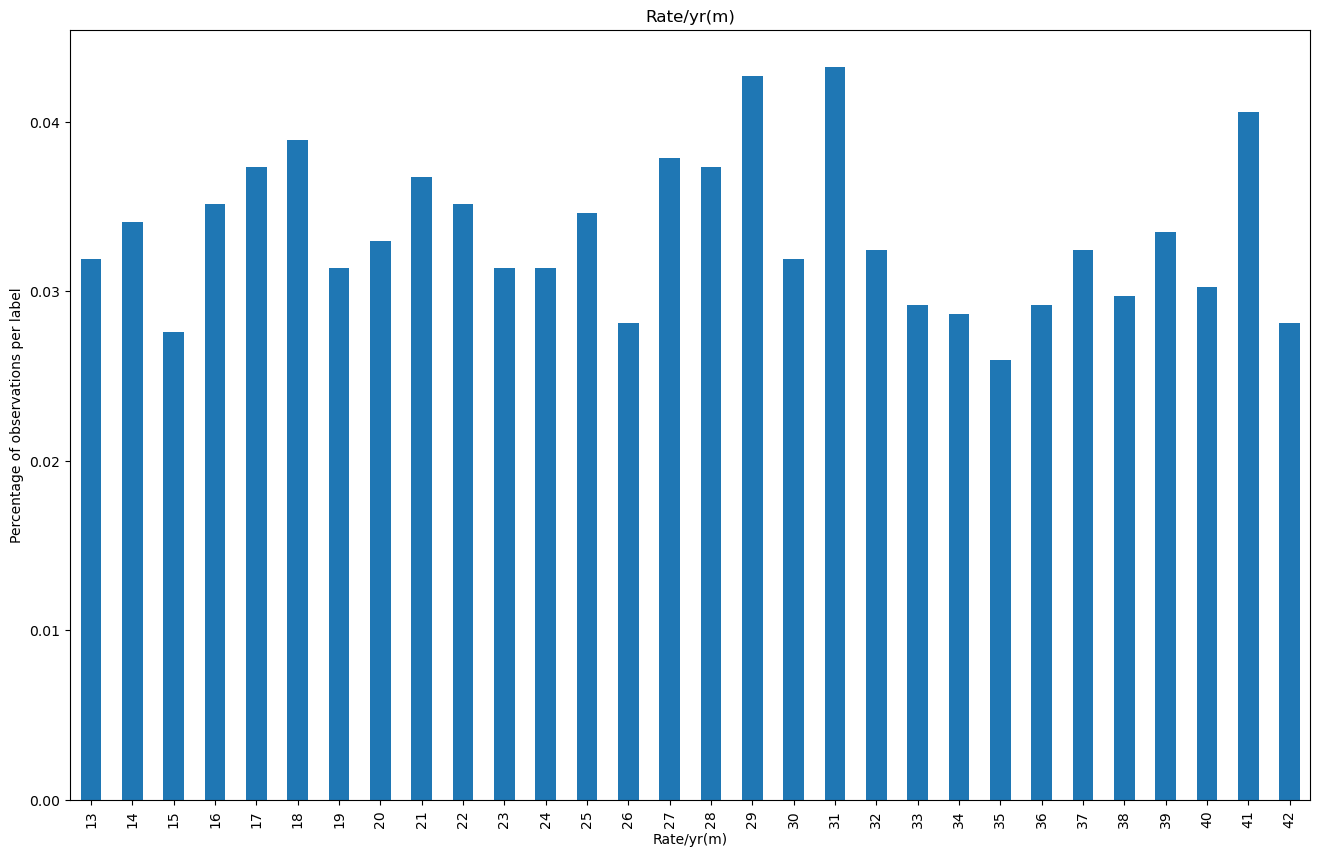

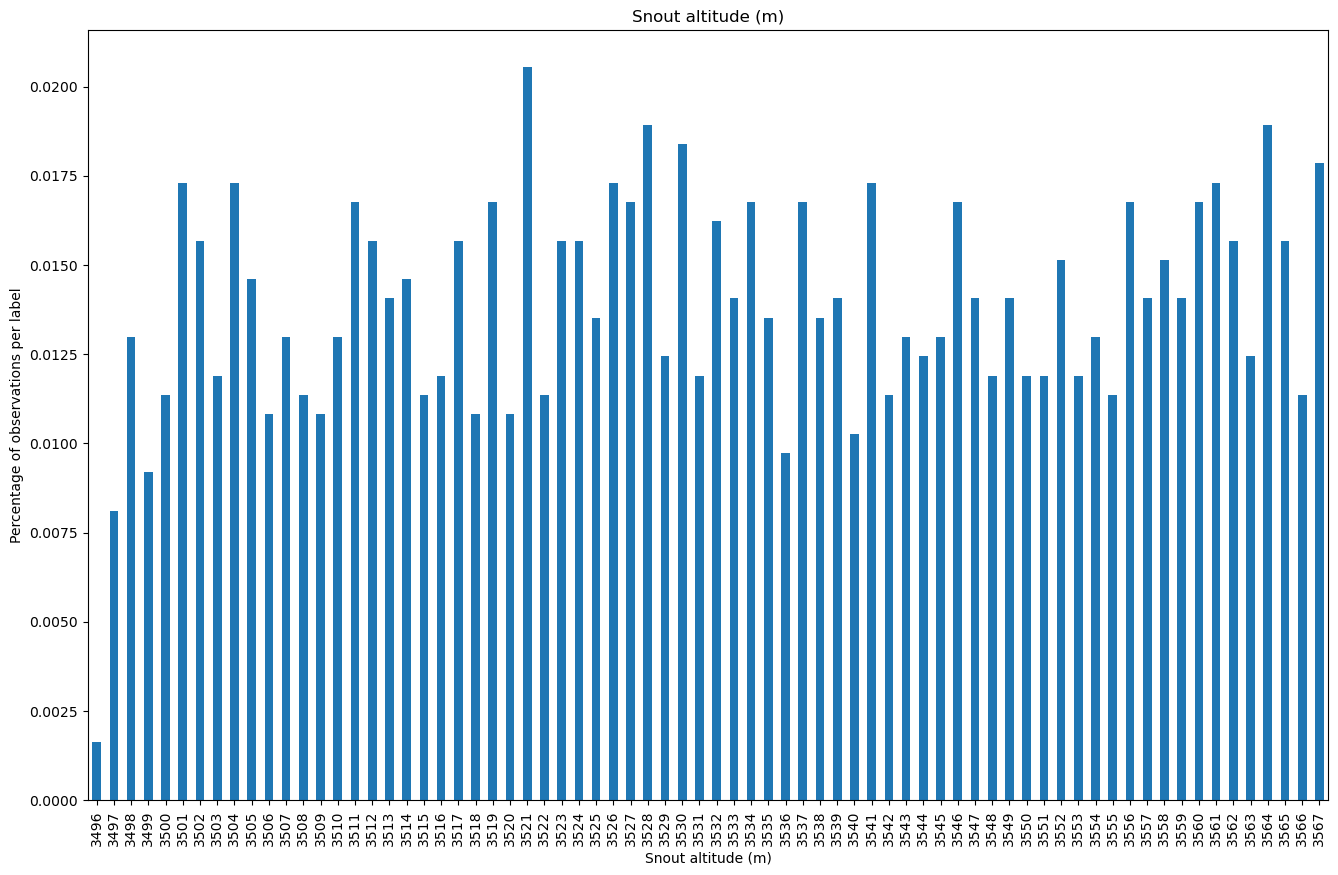

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()